In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [58]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [62]:
print(X,y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] [1 0 1 ... 1 1 0]


In [63]:
X.shape

(10000, 10)

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [65]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [66]:
X.shape

(10000, 10)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [16]:
X.shape

(10000, 12)

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [19]:
ann = tf.keras.models.Sequential()

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [20]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [21]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
ann.compile(optimizer = 'adam' , loss='binary_crossentropy', metrics = 'accuracy')

In [24]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 738us/step - loss: 0.5642 - accuracy: 0.7789
Epoch 2/100
250/250 [==============================] - 0s 661us/step - loss: 0.4795 - accuracy: 0.7990
Epoch 3/100
250/250 [==============================] - 0s 629us/step - loss: 0.4422 - accuracy: 0.8121
Epoch 4/100
250/250 [==============================] - 0s 586us/step - loss: 0.4221 - accuracy: 0.8138
Epoch 5/100
250/250 [==============================] - 0s 567us/step - loss: 0.4069 - accuracy: 0.8191
Epoch 6/100
250/250 [==============================] - 0s 573us/step - loss: 0.3958 - accuracy: 0.8238
Epoch 7/100
250/250 [==============================] - 0s 565us/step - loss: 0.3874 - accuracy: 0.8276
Epoch 8/100
250/250 [==============================] - 0s 628us/step - loss: 0.3792 - accuracy: 0.8355
Epoch 9/100
250/250 [==============================] - 0s 641us/step - loss: 0.3720 - accuracy: 0.8438
Epoch 10/100
250/250 [==============================] - 0s 654us/step - l

In [36]:
x_t = np.array(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))
x_t

array([[ 1.04501206, -0.61433742, -0.57427105, -0.52978695,  0.8981563 ,
         0.07611425, -0.739106  , -0.29407315,  0.80136281,  0.66011376,
         0.97628121, -0.86697328]])

In [37]:
x_t.shape

(1, 12)

In [40]:
print(ann.predict(x_t) > 0.5)

[[False]]


In [54]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[1532  207]
 [  63  198]]


0.865

In [153]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [140]:
df = pd.read_csv('Churn_Modelling.csv')
display(df.head())


X = df.drop(['RowNumber','CustomerId','Surname','Exited'],1)
Y = df['Exited']

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X.head(10)

ohe = pd.get_dummies(X['Geography'])
X = pd.concat([ohe,X],1)
X.drop('Geography',1,inplace = True)
X.head()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(X_train.shape,X_test.shape)

sc = StandardScaler()

# sc.fit(X_train)

scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(8000, 12) (2000, 12)


In [145]:

# ann = Sequential()
# ann.add(Dense(6,'relu'))
# ann.add(Dense(6,'relu'))
# ann.add(Dense(1,'sigmoid'))

ann = Sequential([
    Dense(6,'relu'),
    Dense(6,'relu'),
    Dense(1,'sigmoid')
])

ann.compile('adam','binary_crossentropy', ['accuracy'])


In [146]:
hist = ann.fit(scaled_X_train,y_train,batch_size = 32,epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 732us/step - loss: 0.5404 - accuracy: 0.7771
Epoch 2/100
250/250 [==============================] - 0s 707us/step - loss: 0.4557 - accuracy: 0.7979
Epoch 3/100
250/250 [==============================] - 0s 657us/step - loss: 0.4310 - accuracy: 0.8115
Epoch 4/100
250/250 [==============================] - 0s 673us/step - loss: 0.4205 - accuracy: 0.8213
Epoch 5/100
250/250 [==============================] - 0s 679us/step - loss: 0.4143 - accuracy: 0.8249
Epoch 6/100
250/250 [==============================] - 0s 623us/step - loss: 0.4098 - accuracy: 0.8274
Epoch 7/100
250/250 [==============================] - 0s 642us/step - loss: 0.4065 - accuracy: 0.8301
Epoch 8/100
250/250 [==============================] - 0s 650us/step - loss: 0.4036 - accuracy: 0.8325
Epoch 9/100
250/250 [==============================] - 0s 675us/step - loss: 0.4008 - accuracy: 0.8326
Epoch 10/100
250/250 [==============================] - 0s 672us/step - l

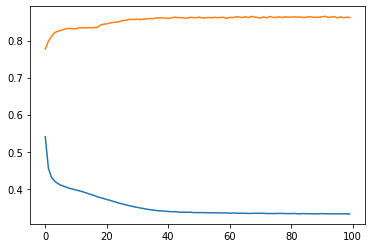

In [151]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.show()

In [149]:
ann.layers[0].get_weights()

[array([[-0.14846493, -0.5806151 , -0.34961548,  0.16204941,  0.7436645 ,
          0.0476106 ],
        [ 0.12830338, -0.01590409, -0.30873832,  0.47975117,  0.3391341 ,
         -0.05953092],
        [-0.15147927, -0.30967432, -0.3392111 ,  0.31096527, -1.037524  ,
          0.1586034 ],
        [ 0.02084333, -0.00450727, -0.1867324 ,  0.04885284,  0.07226826,
         -0.01484017],
        [-0.04348767, -0.19348286,  0.19807734, -0.05122649,  0.08795932,
          0.19994894],
        [ 0.0126115 , -0.48738837,  1.1653973 ,  0.68608713, -0.21672836,
         -0.25376135],
        [ 0.01701648, -0.12343723, -0.03467679,  0.06243037, -0.02071879,
          0.08792367],
        [-0.2991353 ,  0.18931466, -0.39460546, -0.08242956,  0.11375532,
         -0.34873438],
        [-1.3707049 , -0.6216056 , -0.8415321 , -0.49650407, -0.43071502,
         -0.48612687],
        [ 0.05112376,  0.09526378, -0.12121294,  0.2729577 , -0.03509059,
         -0.03124431],
        [-0.06878959, -0.05494

In [143]:
y_pred = ann.predict(scaled_X_test)
y_pred = (y_pred > 0.5)
y_pred

np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [144]:
cm = confusion_matrix(y_pred,y_test)
print(cm)
print(accuracy_score(y_pred,y_test))

[[1522  197]
 [  73  208]]
0.865
